<h1>Содержание<span class="tocSkip"></span></h1>
</a></span><li><span><a  href="#Изучение данных из файла" data-toc-modified-id="Изучение данных из файла"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский анализ данных" data-toc-modified-id="Исследовательский анализ данных"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследовательский анализ данных" data-toc-modified-id="Составление портрета пользователя каждого региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Проверка гипотезы" data-toc-modified-id="Проверка гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотезы</a></span></li><li><span><a href="#Общий вывод" data-toc-modified-id="Общий вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

Представлены данные магазина «Стримчик», который который занимается продажей компьютерных игр. Предоставленный датасет содержит информацию о продаже игр, оценки пользователей, жанры и платформы. Необходимы выяснить, какие новые продукты будут успешными. Информация необходиму менеджерам для планированяи бюджета, выделенного на рекламу.

## Изучение данных из файла

In [1]:
# импортировала необходимые библиотеки:
 
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
table_game = pd.read_csv('/datasets/games.csv') # прочитала файл /datasets/games.csv и сохранила его в переменной table_game
display(table_game.head(15)) # вывела на экран первые пятнадцать строк таблицы
table_game.info() # получила общую информацию о таблице

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В таблице одинадцать столбцов. Встречаются несколько типов данных в столбцах — object и float. Всего 16715 строк, во многих столбцах стречаются пропуски, для дальнейшей работы требуется предобработка даннных. 

1) В сольбце Name 16713 строк, встречаются пропуски, в виду малого количества пропусков и невозможности их заменить - пропуски можно удалить.
2) В столбце Year_of_Release 16446, встречаются пропуски, их немного - 1,6 % от общего массива данных, поэтому также можно удалить, также необходимо изменить формат данных.
3) В столбце Genre 16713 строк, встречаются пропуски, их также немного, заменить их нет возможности, поэтому удаляем.
4) В столбцах Critic_Score, User_Score и Rating большая часть данных - это пропуски, удалить их нельзя, так как будет потеряна вся информация, заменить их на среднее или на 0 некорректо, так как это исказит данные, поэтому эти значения оставляем без изменений.

Все столбцы необходимо переименовать, привести названия к нижнему регистру.

## Предобработка данных

In [3]:
#проверяем таблицу на наличие дубликатов

table_game.duplicated().sum()

0

In [4]:
# значения в столбцах таблицы table_game приведены к нижнему регистру

table_game.columns = table_game.columns.str.lower()


In [5]:
# удалены пропуски в столбцах name, year_of_release, genre

table_game.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

В столбцах Critic_Score, User_Score и Rating большая часть данных - это пропуски, удалить их нельзя, так как будет потеряна вся информация, заменить их на среднее или на 0 некорректо, так как это исказит данные, поэтому эти значения оставляем без изменений.Количество пропусков в столбцах name, year_of_release, genre не превышает 1,6 %, заменить данные нет возможности, удаление этих пропусков не повлияет на дальнейшие расчеты.

Причин появления пропусков может быть несколько - либо отсуствие инфомрации(оценка критиком могла быть просто не проставлена), какой-либо технический сбой ( можно сообщить о проблеме заказчику, что автосистема не всегда корректно определяет информацию) или человеческий фактов (при заполнении данные были пропущены). По аналогичным причинам пропуски могли появиться в столбцах 'name', 'genre', 'year_of_release'.

In [6]:
# изменила тип данных в столбце year_of_release

table_game['year_of_release'] = table_game['year_of_release'].astype(int)

Год выпуска - это целочисленное значение, поэтому меняю формат данных. В остальных столбцах оставляем тип данных float, так как продажи, оценки и рейтинги могут быть не целочисленными значениями.

In [7]:
table_game['critic_score'].unique() # проверяем уникальные значения в столбце critic_score

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Аномальных значений в столбце critic_score не выявлено.

In [8]:
table_game['user_score'].unique() # проверяем уникальные значения в столбце user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score выялано артефактное значение - 'tbd'. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Данные из этого столбца понадобятся для дальнейшей работы, поэтому заменяем значение на 0 и изменяем тип данных на float.

In [9]:
# заменяем значение tbd на 0

table_game = table_game.replace('tbd', '0')
table_game['user_score'] = table_game['user_score'].astype('float')


In [10]:
# проверяем полученные данные
table_game['user_score'].unique() # проверяем уникальные значения в столбце user_score

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 0. , 8.8, 6.9, 9.4,
       6.8, 6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1,
       5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1,
       3.5, 2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [11]:
# Считаем суммарные продажи во всех регионах и создаем отдельный столбец

table_game['general_sales'] = table_game['na_sales'] + table_game['eu_sales'] + table_game['other_sales'] + table_game['jp_sales']
display(table_game.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [12]:
table_game.info() # проверила итоговую полученную таблицу

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           9768 non-null   object 
 11  general_sales    16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Вывод

Проведена предобработка данных, проверены дубликаты, удалены пропущенные значения, изменены форматы данных. Получена итоговая таблица table_game для дальнейшего анализа данных.

## Исследовательский анализ данных

Проверяем, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [13]:
table_game_year = table_game.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
display(table_game_year.head())

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [14]:
#table_game_year['year_of_release'].describe()

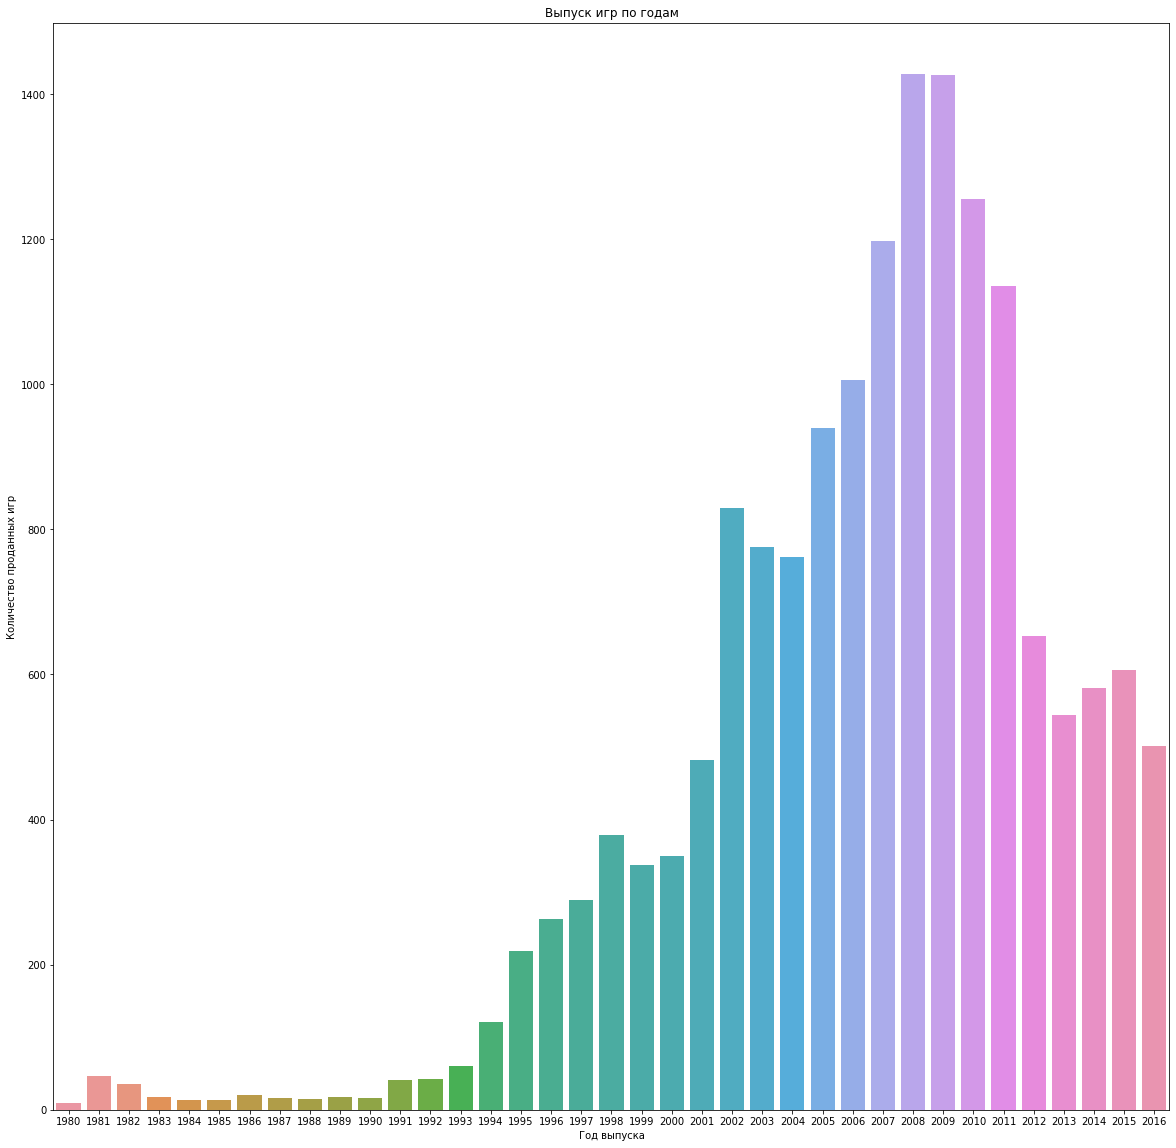

In [15]:
ax = sns.barplot(data = table_game_year, x='year_of_release', y='name')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных игр')
plt.title('Выпуск игр по годам')
ax.figure.set_size_inches(20,20)

 Из полученного графика видно, что брать весь объем данных не нужно, пики лежат в правой части графика, левая часть не несёт актуальной информации, при этом делает весь график неинформативным. Получим срез даннных из сводной таблицы table_game_year за последние 10 лет.

In [16]:
#методом query получаем срез данных за последние 10 лет

table_game_year = table_game_year.query('year_of_release > 2005')

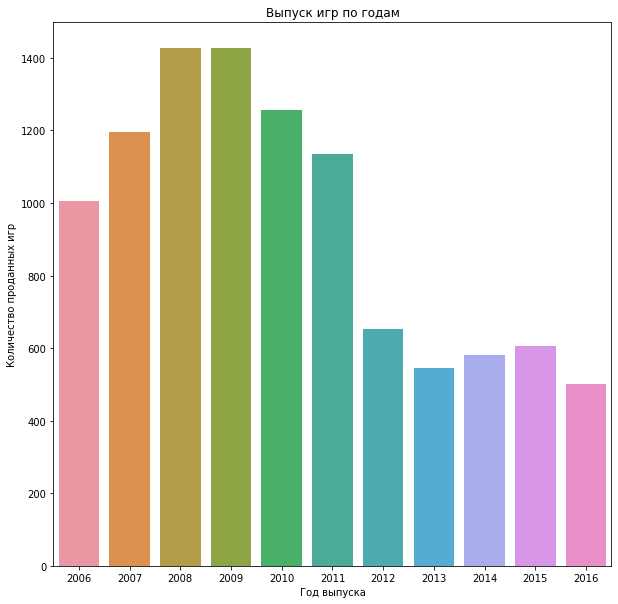

In [17]:
bx = sns.barplot(data = table_game_year, x='year_of_release', y='name')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных игр')
plt.title('Выпуск игр по годам')
bx.figure.set_size_inches(10,10)

Из полученного графика видно, что основной пик выпуска игр приходится на 2008 и 2009 года. С 2012 года наблюдается заметный спад этого показателя. Падение продаж видеоигр объясняется тем, что потребители стали чаще покупать игры для мобильных устройств, а также играть через социальные сети, например Facebook. Розничные продажи видеоигр, игровых консолей и аксессуаров в США за год упали на 25%. Интерес потребителей смещается к играм для мобильных устройств и социальных сетей.

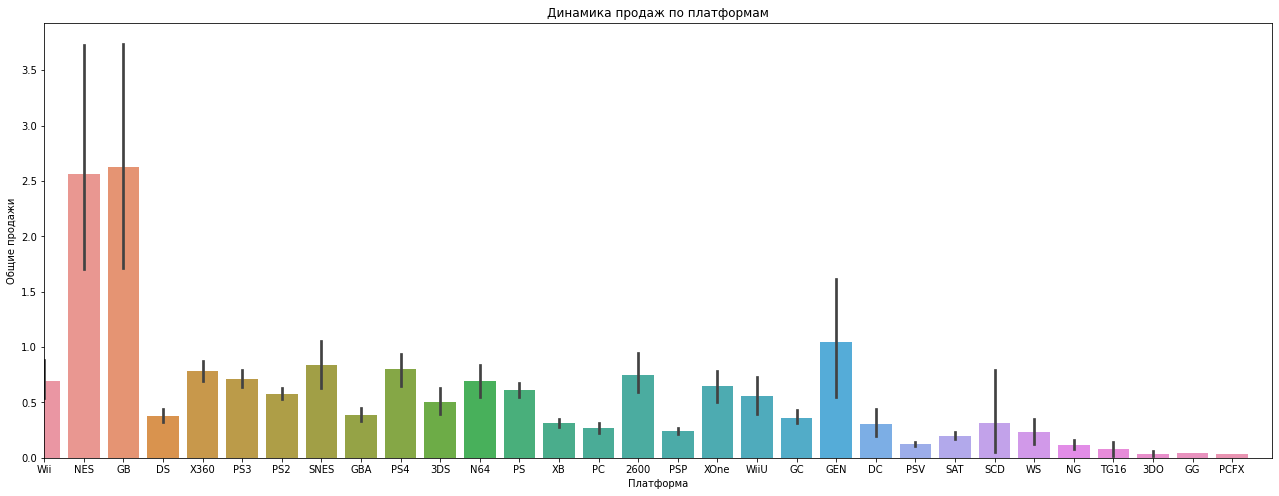

In [18]:
#Посмотрите, как менялись продажи по платформам. 

cx = sns.barplot(data = table_game, x='platform', y='general_sales')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.title('Динамика продаж по платформам')
plt.xlim(0,31)
cx.figure.set_size_inches(22,8)

In [19]:
#Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

#получена сводная таблица со значениями суммарных продаж для каждой платформы
table_game_platform = table_game.pivot_table(index='platform', values='general_sales', aggfunc='sum')

# выведены на экран топ-5 платформ с наибольшими суммарными продажами
display(table_game_platform .sort_values(by = 'general_sales', ascending = False).head())

,general_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Получено топ-5 платформ с наибольшими суммарными продажами - это PS2,X360,PS3,Wii и DS.				

In [20]:
table_game_platform_new = table_game.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum')

In [21]:
#display(table_game_platform_new.head())

Text(0, 0.5, 'Продажи')

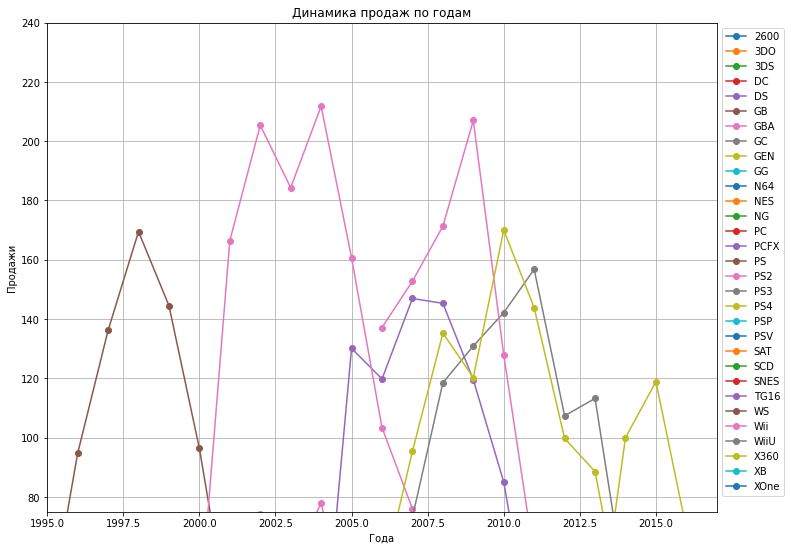

In [22]:
table_game_platform_new.plot(title='Динамика продаж по годам', ylim = (75,240), xlim=(1995,2017), figsize = (12,9),grid=True, style='o-')
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Года')
plt.ylabel('Продажи')

Для более информативного графика построим зависмость продаж по годам для топ-5 лидирующих по продажам платформ. Ранее выяснили, что это PS2,X360,PS3,Wii и DS.

In [23]:
#поулчим новый датафрейм для топ-5 лидирующих платформ

df = pd.DataFrame({
                   'PS2': table_game_platform_new['PS2'], 
                   'X360': table_game_platform_new['X360'], 
                   'PS3': table_game_platform_new['PS3'],
                   'Wii': table_game_platform_new['Wii'],
                  'DS': table_game_platform_new['DS']})

In [24]:
#display(df.head())

Text(0, 0.5, 'Продажи')

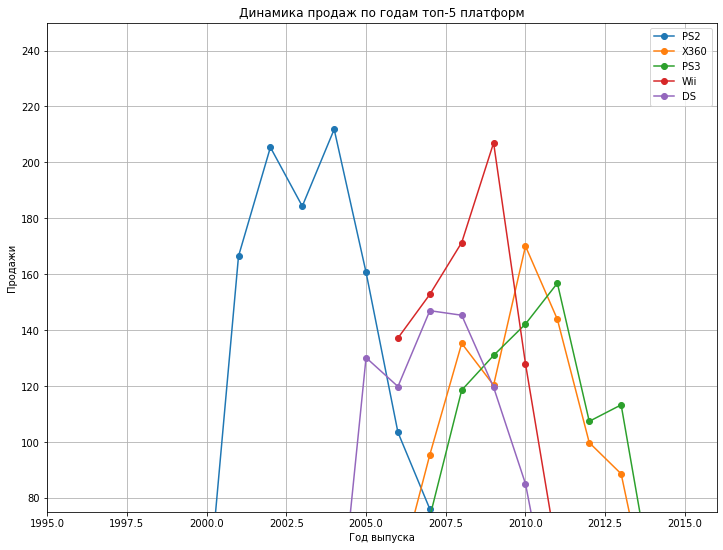

In [25]:
df.plot(title='Динамика продаж по годам топ-5 платформ', ylim = (75,250), xlim=(1995,2016), figsize = (12,9),grid=True, style='o-')
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Из полученного графика видно, что топ-5 платформ с наибольшими продажами стали популярными после 2000-ого года. Срок жизни игры составляет в среднем от 5 до 7 лет, если посмотреть на график для некоторых игр это значение составляет 10 лет.Индустрия компьютерных игр - быстро меняющаяся, поэтому в качестве акутально периода возьмем 3 года 2014,2015 и 2016, с учетом того, что данные за 2016 год неполные.

In [26]:
#методом query получаем срез данных для актуального периода с 2006 года

table_game_actual = table_game.query('year_of_release > 2010')
#display(table_game_actual.head())

In [27]:
# получена сводная таблица для прослеживания динамики продаж за актуальный период

table_game_actual_new = table_game_actual.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum')
#display(table_game_actual_new.head())

Text(0, 0.5, 'Продажи')

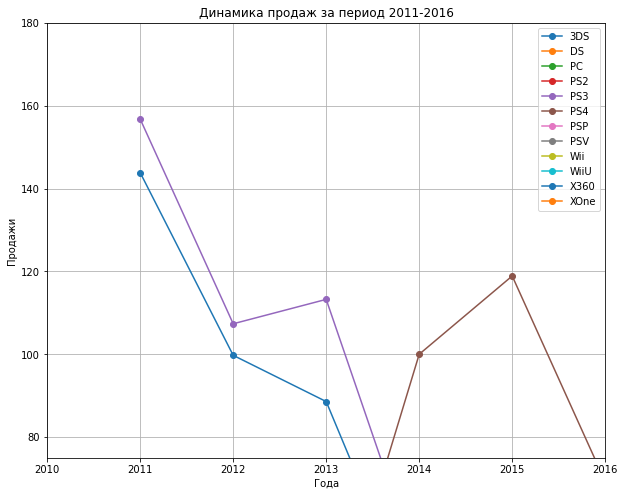

In [28]:
table_game_actual_new.plot(title='Динамика продаж за период 2011-2016', ylim = (75,180), xlim=(2010,2016), figsize = (10,8),grid=True, style='o-')
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Года')
plt.ylabel('Продажи')

Из динамики продаж за 2010-2016 года видно, что к 2016 году продажи падают по всем платформам. Актуальным периодом считаем последние 2-3 года, то есть можно предположить, что потенциально прибыльной можно считать одну платформу - PS4 (на графике видны продажи с 2016 года только по этой платформе).

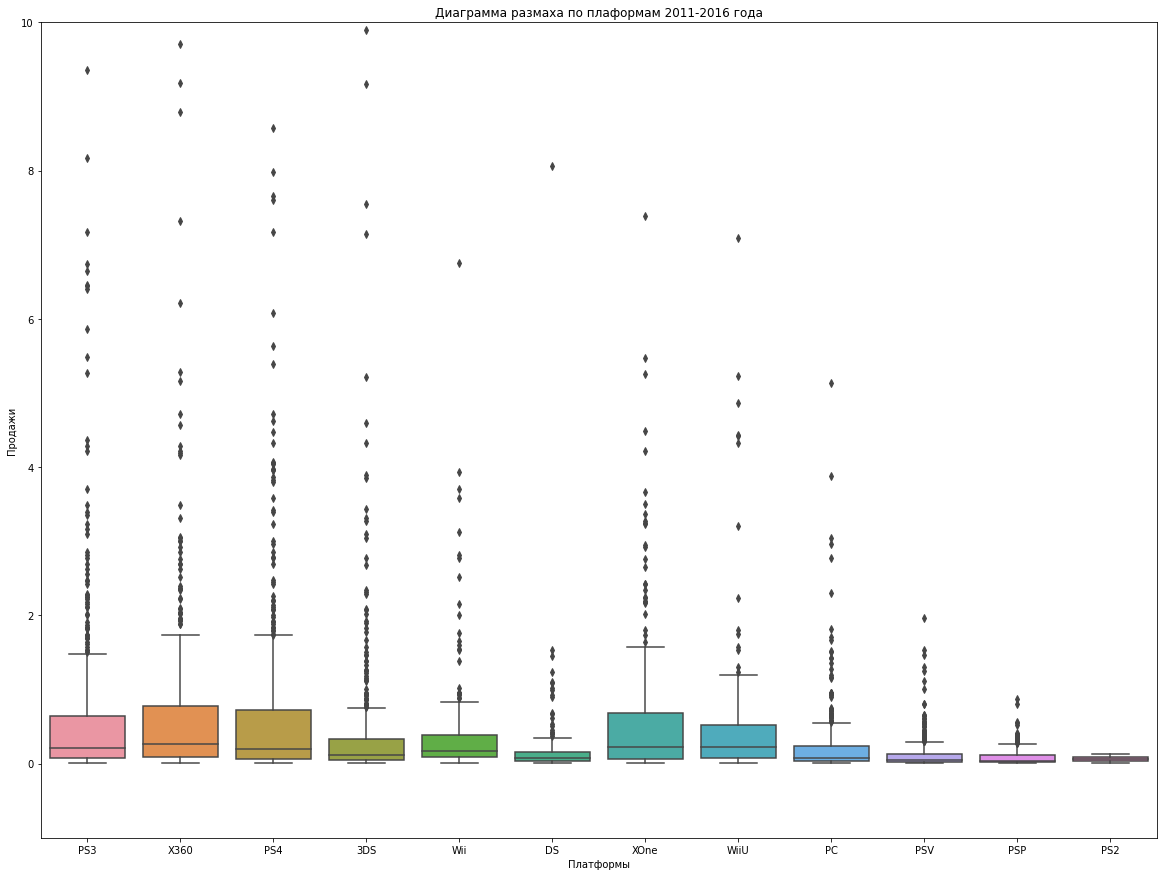

<Figure size 1440x1080 with 0 Axes>

In [29]:
#построены диаграммы размаха потенциально прибыльных платформ
fig, ax = plt.subplots(figsize = (20,15))
bc = sns.boxplot(x='platform', y = 'general_sales', data = table_game_actual, ax=ax)
plt.title('Диаграмма размаха по плаформам 2011-2016 года')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(-1,10)
bc = plt.figure(figsize=(20,15))
plt.show()

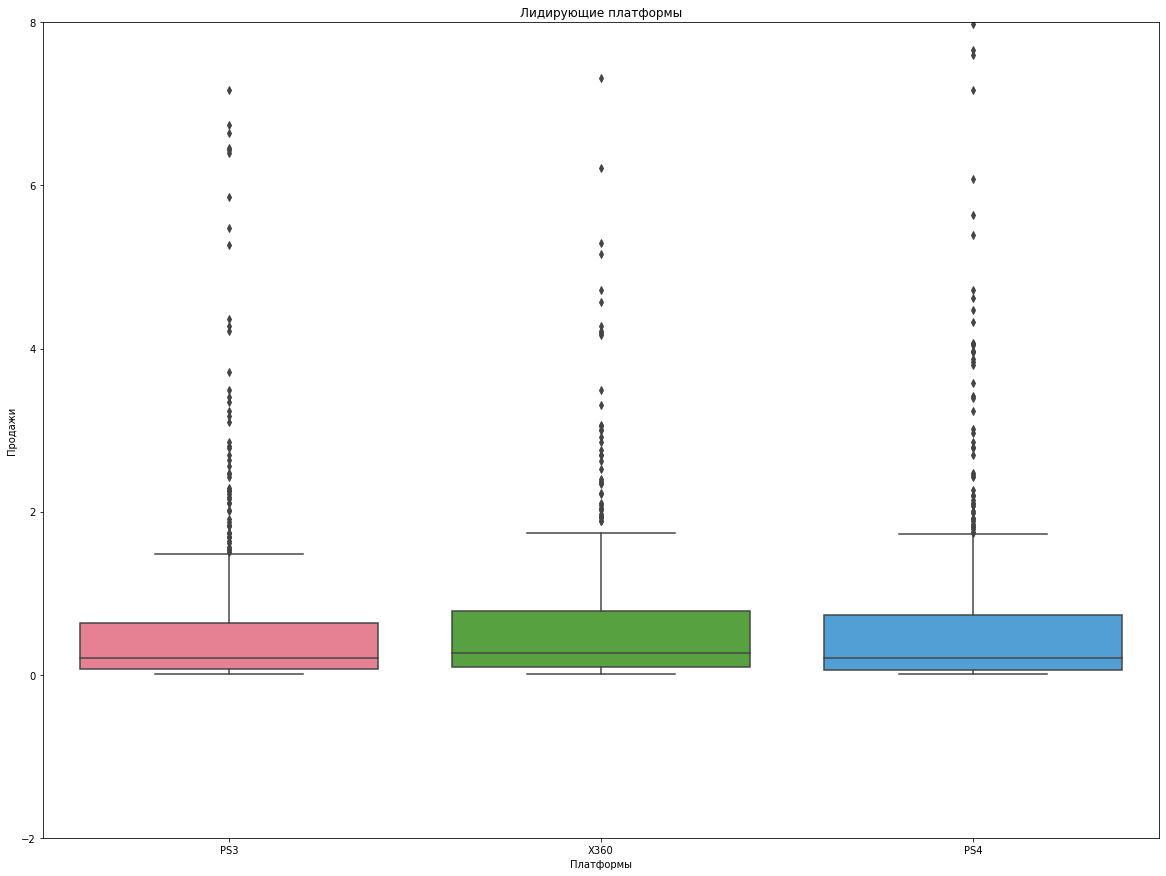

In [30]:
fig, ax = plt.subplots(figsize = (20,15))
sns.boxplot(data = table_game_actual[table_game_actual['platform'].isin(('PS4', 'X360', 'PS3'))], x='platform', y = 'general_sales', palette = 'husl', ax=ax)
plt.title('Лидирующие платформы')
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.ylim(-2,8)
plt.show()

In [31]:
#получена информация о платформе PS3
table_game_actual_new['PS3'].describe()

count      6.000000
mean      74.261667
std       60.695667
min        3.600000
25%       24.555000
50%       77.560000
75%      111.777500
max      156.780000
Name: PS3, dtype: float64

In [32]:
#получена информация о платформе X360
table_game_actual_new['PS4'].describe()

count      4.000000
mean      78.535000
std       40.567917
min       25.990000
25%       58.435000
50%       84.625000
75%      104.725000
max      118.900000
Name: PS4, dtype: float64

In [33]:
#получена информация о платформе Wii
table_game_actual_new['X360'].describe()

count      6.000000
mean      63.396667
std       56.074638
min        1.520000
25%       17.655000
50%       61.660000
75%       96.950000
max      143.840000
Name: X360, dtype: float64

Построены Диагарммы размаха - для потенциально прибыльной платфорсы PS4 - и для нагладности добавлены еще 2 платформы - это PS3 и X360 (по ним наблюдались продажи за период с 2011-2014 гг).Значения лежат приблизительно в одном диапозоне, средние суммарные продажи 85, 78 и 62 соответвенно (миллионов проданных копий по всем регионам за указанный период 2011-2016 гг). Везде медианные значения продаж расположены низко – то есть на всех платформах выходит много игр с небольшими продажами, но есть бестселлеры, продажи которых могут многократно превышать обычные значения.

Посмотрим, как влияют на продажи отзывы пользователей и критиков (на примере платформы X360)

In [34]:
# получим срез данных для платформы X360

table_game_x360 = table_game.query('platform == "X360"').reset_index()
display(table_game_x360.head())

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
3,32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
4,35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Построим диаграмму рассеянимя для просмотра зависимости продаж от отзывов критиков.

(0.0, 18.0)

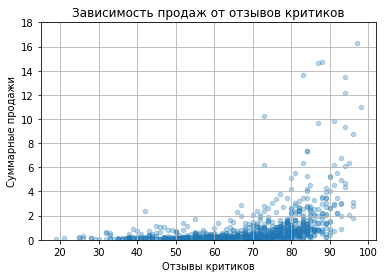

In [35]:
table_game_x360.plot(x='critic_score', y='general_sales', kind='scatter',alpha=0.3, grid=True)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Суммарные продажи')
plt.ylim(0,18)

In [36]:
# рассчитываем коэффициент корреляции Пирсона

print(table_game_x360['general_sales'].corr(table_game_x360['critic_score']))

0.39286589254007


Kоэффициент корреляции Пирсона составляет 0,4%, то есть прослеживается прямая зависимость этих двух показателей, чем выше отзывы критиков, тем выше продажи, эту же зависимость можно проследить на диаграмме рассеяния.

Построим диаграмму рассеяния для просмотра зависимости продаж от отзывов пользователей.

(0.0, 20.0)

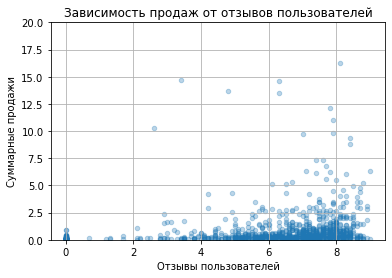

In [37]:
table_game_x360.plot(x='user_score', y='general_sales', kind='scatter',alpha=0.3, grid=True)
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Суммарные продажи')
plt.ylim(0,20)

In [38]:
# рассчитываем коэффициент корреляции Пирсона

print(table_game_x360['general_sales'].corr(table_game_x360['user_score']))

0.16726185976615246


Kоэффициент корреляции Пирсона составляет 0,17%, значение близко к 0, то есть зависимость продаж от отзывов пользователей есть, но не такая ярко выраженная, как в случае с отзывами критиков.

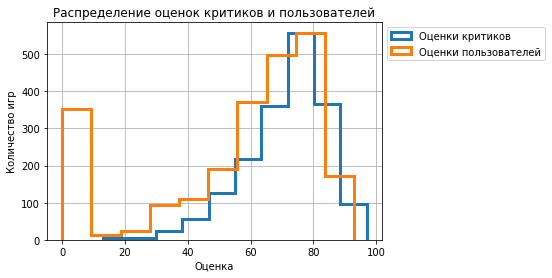

<Figure size 2160x1440 with 0 Axes>

In [39]:
fig, ax = plt.subplots()
table_game_actual.critic_score.hist(histtype='step', linewidth=3, ax=ax, label='Оценки критиков')
(table_game_actual.user_score*10).hist(histtype='step', linewidth=3, ax=ax, label='Оценки пользователей')
ax.legend(loc='upper left')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество игр')
ax.set_title('Распределение оценок критиков и пользователей')
plt.legend(bbox_to_anchor = (1,1))
ax = plt.figure(figsize=(30,20))

plt.show()

То есть можно сделать предположение, что для всех остальных платформ дейсвтуют аналогичные зависимости, и продажи зависят от отзывов пользователей и критиков, и чем выше отзывы, тем больше продажи, но это не критчное и не определяющее значение, в случае оценки пользователей - это значение вообще близко к 0, то есть влияет, но слабо.

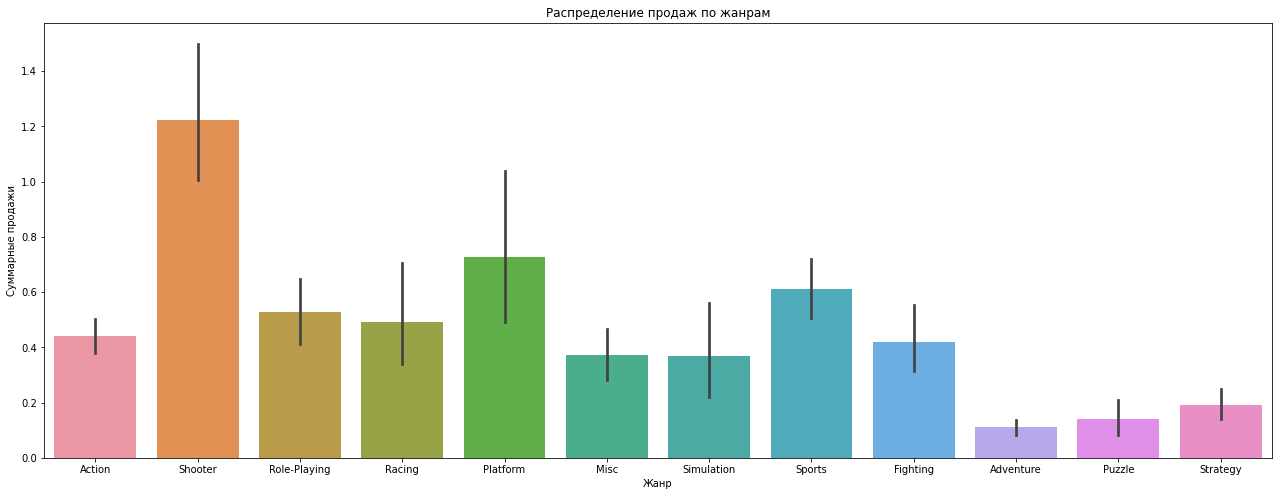

In [40]:
# посмотрим зависимость суммарных продаж в зависимости от жанра

bx = sns.barplot(data = table_game_actual, x='genre', y='general_sales')
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
bx.figure.set_size_inches(22,8)

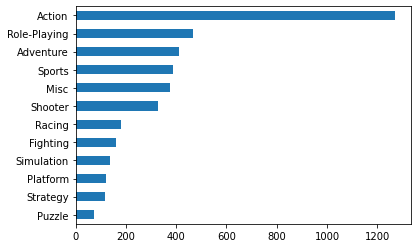

In [41]:
table_game_actual.genre.value_counts().sort_values().plot(kind='barh')
plt.show()

In [42]:
#получена сводная таблица со значениями суммарных продаж для каждой платформы
table_game_genre = table_game_actual.pivot_table(index='genre', values='general_sales', aggfunc='median')

# выведены на экран топ-5 платформ с наибольшими суммарными продажами
display(table_game_genre .sort_values(by = 'general_sales', ascending = False).head())

,general_sales
genre,
Shooter,0.410
Sports,0.200
Platform,0.185
Fighting,0.180
Racing,0.160


Из полученного графика и таблицы (выведены топ-5 жанров с самыми высокими средними продажами) видно, что выделяются жанры с высокими и низкими продажами, самыми прибыльными жанрами являются Shooter и Sports.	Это также подтверждают различные исследования киберспорта. Самыми популярными жанрами среди ПК-игроков чаще всего оказываются шутеры, гонки и симуляторы военной техники. По количеству игр - самыми часто всречающими являются игры Action, Sports	 и Music.

## Составление портрета пользователя каждого региона

In [43]:
table_game_actual = table_game_actual.fillna('не определён')

# Расшифровка абревиатур рейтинга ESRB

- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. 

- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет

- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 

- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 

- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [44]:
display(table_game_actual.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,не определён,не определён,не определён,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,не определён,не определён,не определён,14.60


# Портрет пользвотеля региона Na (Северная Америка)

In [45]:
table_game_actual_na = table_game_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum')

display(table_game_actual_na.sort_values(by = 'na_sales', ascending = False).head())

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


In [46]:
table_game_genre_na = table_game_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum')

display(table_game_genre_na.sort_values(by = 'na_sales', ascending = False).head())

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


In [47]:
table_game_na_rating = table_game_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')

display(table_game_na_rating.sort_values(by = 'na_sales', ascending = False))

,na_sales
rating,
M,308.45
E,170.17
не определён,123.69
E10+,117.72
T,109.31
EC,0.42
RP,0.00


# Вывод
Для региона Северной Америке в топ-3 платформ с наибольшими продажами вошли X360, Wii и PS3, самые популярные жанры -Action, Sports	и Shooter. Согласно рейтингу организации ESRB - наибольшие продажи у игр с категорией «M» («Mature») — «Для взрослых». Лидирующие платформы носят логичный характер.Xbox 360 (дата выхода 2005 год, то есть на год продажи превышают суммарное значение) — вторая по счёту игровая приставка компании Microsoft, которая последовала за Xbox. Конкурентами Xbox 360 среди игровых платформ седьмого поколения являлись PlayStation 3(дата выхода 2006 год) от Sony Computer Entertainment и Wii от Nintendo (дата выхода 2006 год).

# Портрет пользвотеля региона EU (Европа)

In [48]:
table_game_actual_eu = table_game_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum')

display(table_game_actual_eu.sort_values(by = 'eu_sales', ascending = False).head())

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


In [49]:
table_game_genre_eu = table_game_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum')

display(table_game_genre_eu.sort_values(by = 'eu_sales', ascending = False).head())

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


In [50]:
table_game_eu_rating = table_game_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

display(table_game_eu_rating.sort_values(by = 'eu_sales', ascending = False).head())

,eu_sales
rating,
M,250.26
E,141.73
не определён,116.61
T,83.16
E10+,78.00


# Вывод
Для Европы также в топ-3 лидирующих платформ входят X360, Wii и PS3, только в лидеры выбивается платформа PS3, из источников можно найти информацию, что платформа действительно имела успех среди пользователей этого региона (Европейская ассоциация видео- и аудиотехники (EISA) наградила Sony за выдающиеся мультимедийные возможности PS3). И также согласно рейтингу организации ESRB - наибольшие продажи у игр с категорией «M» («Mature») — «Для взрослых». Среди жанров - самые популярные Action, Sports и Shooter, что также подтверждается различными истониками и общемировами рейтингами.

# Портрет пользвотеля региона JP (Япония)

In [51]:
table_game_actual_jp = table_game_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum')

display(table_game_actual_jp.sort_values(by = 'jp_sales', ascending = False).head())

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96


In [52]:
table_game_genre_jp = table_game_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum')

display(table_game_genre_jp.sort_values(by = 'jp_sales', ascending = False).head())

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


In [53]:
table_game_jp_rating = table_game_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

display(table_game_jp_rating.sort_values(by = 'jp_sales', ascending = False).head())

,jp_sales
rating,
не определён,138.21
E,36.68
T,33.39
M,26.14
E10+,11.23


# Выводы
Для Японии в топ-3 лидирующих платформ входят DS,3DS и PS3 - все три платформы японского производства,DS возможно вырывается вперед в виду раннего выхода (2004 год), 3DS, возможно входит топ из-за цены, так как из-за изначально невысоких продаж полсе выхода, цены были снижены, что привело к значительному повышению спроса .Выводу согласно рейтингу организации ESRB нет возможности сделать, так как у болей части игр этит кретерий не определён. Среди жанров - самые популярные являются Role-Playing, Action и Misc. 

Японская ролевая игра (англ. Japanese Role-Playing Game или JRPG) — поджанр, выделяемый среди компьютерных ролевых игр. Большинство таких игр было разработано в Японии и в первую очередь для внутреннего японского рынка для игровых приставок, то есть этим и объясняется большая популярность этого жанра в Японии.

# Портрет пользвотеля других регионов

In [54]:
table_game_actual_other = table_game_actual.pivot_table(index='platform', values='other_sales', aggfunc='sum')

display(table_game_actual_other.sort_values(by = 'other_sales', ascending = False).head())

,other_sales
platform,
PS3,64.82
PS4,48.35
X360,33.13
XOne,14.27
3DS,13.27


In [55]:
table_game_genre_other = table_game_actual.pivot_table(index='genre', values='other_sales', aggfunc='sum')

display(table_game_genre_other.sort_values(by = 'other_sales', ascending = False).head())

,other_sales
genre,
Action,64.14
Shooter,48.54
Sports,28.88
Role-Playing,19.68
Misc,12.41


In [56]:
table_game_other_rating = table_game_actual.pivot_table(index='rating', values='other_sales', aggfunc='sum')

display(table_game_other_rating.sort_values(by = 'other_sales', ascending = False).head())

,other_sales
rating,
M,81.96
E,40.86
не определён,33.97
T,28.17
E10+,23.91


# Вывод
Для остальных регионов наблюдаются аналогичные выводы как для регинов Северной Америки и Европы.

## Проверка гипотезы

In [57]:
display(table_game_actual.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,не определён,не определён,не определён,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,не определён,не определён,не определён,14.60


Проверка гипотез начинается с формулировки нулевой гипотезы H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы. Исходя из H₀ формулируется альтернативная гипотеза H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Предположим, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

- H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются

Общепринятые пороговые значения — 5% и 1%, поэтому примем, что alpha = 0.05

In [58]:
table_game['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [59]:
table_game_xb = table_game.query('platform == "XB"').reset_index()
table_game_xb = table_game_xb.dropna().reset_index()

In [60]:
table_game_pc = table_game.query('platform == "PC"').reset_index()
table_game_pc = table_game_pc.dropna().reset_index()

In [61]:
# проверим гипотезы

alpha = 0.05

results = st.ttest_ind(table_game_xb['user_score'], table_game_pc['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.0014833442007507e-11
Отвергаем нулевую гипотезу


То есть гипиотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, отвергаем, то есть рейтинги различаются,  можно предположить так, но это только предположение, так как у нас нет достаточных данных для подтверждения.

Проверим еще одну гипотезу

- H₀ - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- H₁ - •	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

In [62]:
table_game_action = table_game.query('genre == "Action"').reset_index()
table_game_action = table_game_action.dropna().reset_index()

In [63]:
table_game_sports = table_game.query('genre == "Sports"').reset_index()
table_game_sports = table_game_sports.dropna().reset_index()

In [64]:
# проверяем гипотезы

alpha = 0.05

results = st.ttest_ind(table_game_action['user_score'], table_game_sports['user_score'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.763420616883605e-06
Отвергаем нулевую гипотезу


Отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, то есть можно предположить, что они для этих жанров одинаковые, но это только преположение, так как у нас нет достаточных данных для подтверждения.

## Общий вывод

Из проведенного анализа данных можно сделать вывод, что продажи зависят от региона, территориально их можно разбить на 2 - первый - это Северная Америка, Европа и другие страны, и в отдельную категорию попадает Япония. В певрой категории можно выделить топ-3 платформы - это X360, Wii и PS3 и популярные жанры Action, Sports и Shooter. Для Японии же эту будут платформы DS,3DS и PS3 и жанры Role-Playing, Action и Misc. Оценки критиков и пользователей влияют на продажи, но это не критичные и не определяющие параметры, их влияние не велико. Но отдельно можно выделить влияние рейтинга ESRB, выявлено, что игры с рейтином М являются самыми прибыльными.